In [15]:
import pandas as pd

In [16]:
import numpy as np

In [17]:
import seaborn as sns

In [18]:
import seaborn as sns

In [19]:
sns.set()

In [20]:
import matplotlib.pyplot as plt


In [21]:
import os

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

In [23]:

import warnings
warnings.filterwarnings("ignore")

In [24]:
path= 'C:\Users\shyla\Desktop\Dataset'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-24-28a72d013915>, line 1)

In [28]:
path= '/Users/shyla/Desktop/Dataset/'

In [29]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])

In [30]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])
train_variants =  pd.read_csv(path+'training_variants')

In [31]:
train_text.shape

(3321, 2)

In [32]:
train_variants.shape

(3321, 4)

In [33]:
#merging text with train datas
train = pd.merge(train_variants,train_text, how='left',on='ID')
#left join based on its id

In [34]:
train.isnull().sum()
#print sum of missing values

ID           0
Gene         0
Variation    0
Class        0
Text         5
dtype: int64

In [35]:
#remove missing values such as null in dataset and copies to dataframe train
df_train = train.dropna(axis=0).copy()
#array dimension 
df_train.shape

(3316, 5)

In [36]:
df_train.head()
#gives top 5 rows ->head

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [37]:
df_train

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...


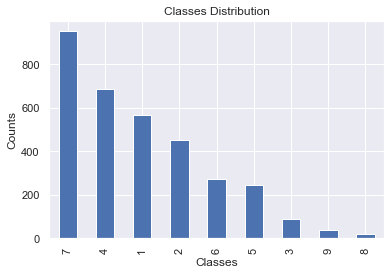

In [40]:
df_train.Class.value_counts().plot(kind="bar",title='Classes Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()
#shows count for classes 1-9

In [47]:
import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [48]:
#getting english stopwords from nltk 
sw_list = stopwords.words('english')


In [51]:
#add punctuation
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©',
'said',"'s", "also",'one',"n't",'com', 'satirewire', '-', '–', "et al",
'—', '_','et al ',"/"]
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
#eleminating duplicates by adding to set
sw_set = set(sw_list)

In [57]:
print(sw_set)

{"doesn't", "don't", 'd', 'can', 'these', 'be', 'before', 'off', 'our', 'does', 'ain', '`', ']', 'down', 'with', ')', 't', 'below', '@', 'doing', 're', '“', '‘', 'hers', 'that', 'which', '!', "isn't", 'had', 'any', 'now', 'isn', 'shan', '|', 'aren', 'out', 'been', 'once', 'its', "hasn't", 'how', 'his', 'was', 'me', "mightn't", "won't", 'or', 'from', 'her', '”', "you'd", '(', '[', 'this', "needn't", 'of', 'as', "you'll", '—', 'hadn', 'if', 'one', 'no', 'wasn', 'wouldn', '’', 'ours', "wouldn't", 'when', 'to', 'each', 'y', 'an', 'didn', 'some', '+', 'very', 'ma', "n't", 'm', 'own', 'yours', 'both', 'it', '*', '=', 'why', 'satirewire', 'have', 'most', 'a', "you're", 'weren', 'won', 'those', "mustn't", 'itself', '``', "'", 'he', 'and', "wasn't", '?', ',', 'under', 'should', 'him', "weren't", 'com', 'ourselves', 'not', 'against', 'haven', 'their', 'nor', 'while', 'yourself', '&', '\\', 'shouldn', 'is', '$', 'i', '^', 'having', "you've", "that'll", 'up', 'am', "''", 'the', 'further', 'o', "ar

In [82]:
#tokenization using nltk
#word tokenization is used here -> sentence breaks into words
def process_review(review):
    tokens = nltk.word_tokenize(review)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [83]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming(review):
    stemmed_review = []
    for w in review:
        stemmed_review.append(ps.stem(w))
    return stemmed_review 

In [90]:
# import libraries
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [91]:
#lemmatixation
#pos = v is verb of that word
def lemmatization(review):
    lemma_list=[]
    for word in review:
        lemma_word=lemmatizer.lemmatize(word,pos='v') 
        lemma_list.append(lemma_word)
    return lemma_list

In [96]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 22:44:32


In [97]:
#obtaining cleaned text data
def data_preprocessing(review):
    #tokenization, stop words removal, punctuation marks removel
    current_time = now.strftime("%H:%M:%S")
    print("start Time tokenization=", current_time)
    processed_review=list(map(process_review,review))
    current_time = now.strftime("%H:%M:%S")
    print("stop Time tokenization=", current_time)
    # stemming
    current_time = now.strftime("%H:%M:%S")
    print("start Time stemming=", current_time)
    stemming_reviews=list(map(stemming,processed_review))
    current_time = now.strftime("%H:%M:%S")
    print("stop Time stemming=", current_time)
    # lemmatization
    current_time = now.strftime("%H:%M:%S")
    print("start Time lemmatization=", current_time)
    lemma_reviews=list(map(lemmatization,stemming_reviews))
    current_time = now.strftime("%H:%M:%S")
    print("stop Time lemmatization=", current_time)
    #print(lemma_reviews)
    return lemma_reviews

In [98]:
cleaned_train_text=data_preprocessing(df_train['Text'])


start Time tokenization= 22:44:32
stop Time tokenization= 22:44:32
start Time stemming= 22:44:32
stop Time stemming= 22:44:32
start Time lemmatization= 22:44:32
stop Time lemmatization= 22:44:32


In [99]:
print(cleaned_train_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [107]:

import pickle
pickle_out1=open('cleaned_train_text', 'wb')
pickle.dump(cleaned_train_text, pickle_out1)
pickle_out1.close()